Now that we have seen the fundamentals of image segmentation in Python using Scikit-Image, you can try to experiment and do it yourself!

Some utility libraries are already included for you, but you may want to use different ones you are more familiar with.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski 
import scipy as sp

Now, go on the webpage of scikit-image (https://scikit-image.org/docs/stable/) and search for the 'astronaut' image.
(Clue: there is a "general-purpose images" section that contains it)

In [2]:
# import the astronaut image here
astronaut = ski.data.astronaut()

Now, display it to make sure everything is visualised correctly...

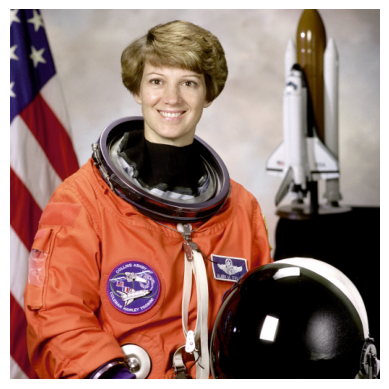

In [3]:
# visualise the image here
plt.imshow(astronaut)
plt.axis('off')
plt.show()

Many segmentation algorithms available are designed to be applied on grayscale images. Therefore, it may be useful to convert coloured images to gray in order to allow for these algorihtms to work.
Convert the image from RGB to grayscale and display it.
(clue: there is a function in scikit-image called "rgb2gray")

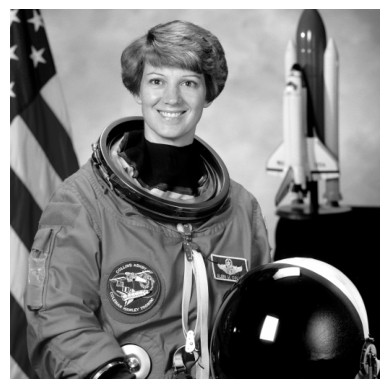

In [4]:
# convert the image to grayscale and display it to make sure.
g_astronaut = ski.color.rgb2gray(astronaut)
plt.imshow(g_astronaut, cmap='gray')
plt.axis('off')
plt.show()

Now, load the "brick" image, check whether it is coloured or in black and white.

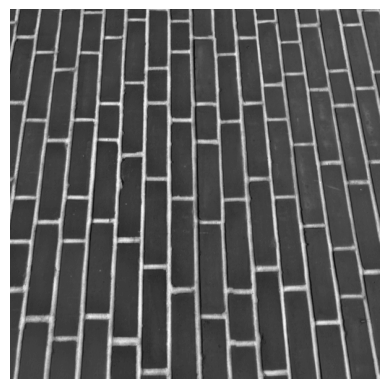

In [5]:
# convert the image to grayscale and display it to make sure.
bricks= ski.data.brick()
plt.imshow(bricks, cmap='gray')
plt.axis('off')
plt.show()

What other ways of checking if the image is in black and white can you think of?
(clue: use numpy to obtain information on the pictures, including those of the astronaut)

In [6]:
# let's inspect the shape of the original and black and white astronaut pictures
print(f"Shape of the original astronaut image: {np.shape(astronaut)}")
print(f"Shape of the black and white astronaut image: {np.shape(g_astronaut)}")

# is there a third dimension (RGB levels) in the brick image?
print(f"Shape of the brick image: {np.shape(bricks)}")

Shape of the original astronaut image: (512, 512, 3)
Shape of the black and white astronaut image: (512, 512)
Shape of the brick image: (512, 512)


Now, let's colour the bricks red. 

Before doing it, we need a way to "find" the bricks in the grayscale image. Luckily, we can reapply the filters we saw in the first notebook.

Mean threshold: 120.33230702657859


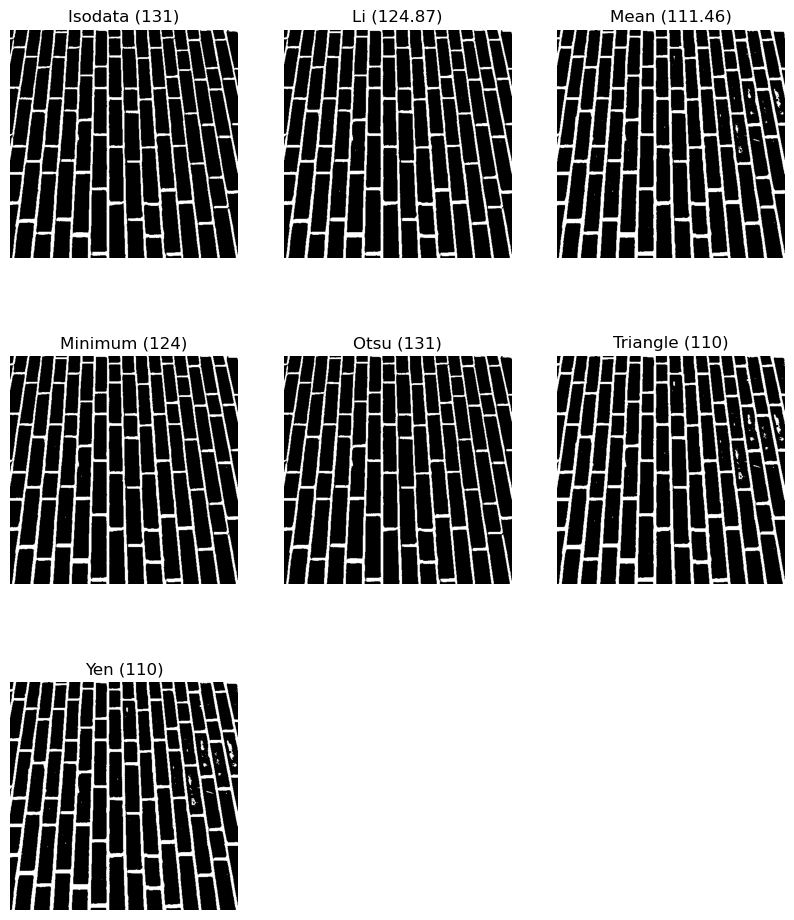

In [7]:
methods = dict(
    zip(
        ['Isodata', 'Li', 'Mean', 'Minimum', 'Otsu', 'Triangle', 'Yen'], 
        [ski.filters.threshold_isodata, ski.filters.threshold_li, ski.filters.threshold_mean, ski.filters.threshold_minimum, ski.filters.threshold_otsu, ski.filters.threshold_triangle, ski.filters.threshold_yen]
    )
)
fig, axes = plt.subplots(
    3,
    3,
    figsize=(10, 12)
)
axes = np.ravel(axes)
thresholds = {}
for idx, (method, algorithm) in enumerate(methods.items()):
    try:
        thresh = algorithm(bricks)
        thresholds[method] = thresh
        masked = bricks > thresh
        axes[idx].imshow(masked, cmap='gray')
        axes[idx].axis('off')
        axes[idx].set_title(f"{method} ({round(thresh, 2)})")
    except Exception as e:
        print(f"Exception with algorithm {method}: {e}")

for idx in range(len(methods.keys()), len(axes)):
    axes[idx].remove()
    
print(f"Mean threshold: {np.mean(list(thresholds.values()))}")
plt.show()

Select the best threshold (the one keeping all bricks intact) and let's make a mask. The mean of the thresholds is a good value as well. The mask is WHITE where the value is true (i.e., there is a brick there), and BLACK otherwise!

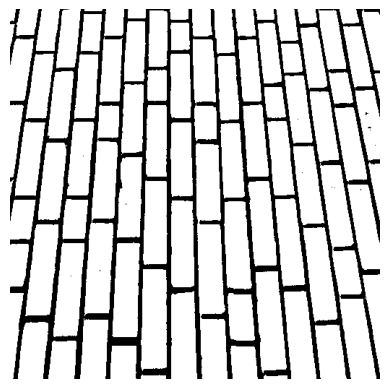

In [8]:
m_bricks = bricks < 120
plt.imshow(m_bricks, cmap='gray')
plt.axis('off')
plt.show()

Now that we have a mask, we can convert the image from gray to RGB values.
(clue: the function for this in scikit-image is named very similarly to the one converting from RGB to gray)

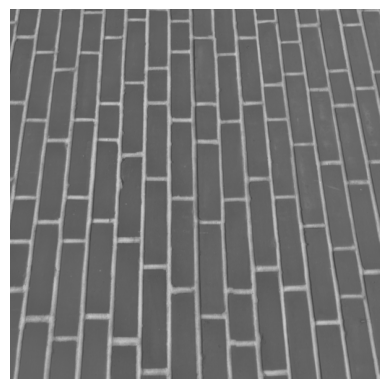

In [9]:
c_bricks = ski.color.gray2rgb(bricks)
plt.imshow(c_bricks)
plt.axis('off')
plt.show()

First option: just multiply the RGB image for the red colour. What is wrong with this approach?

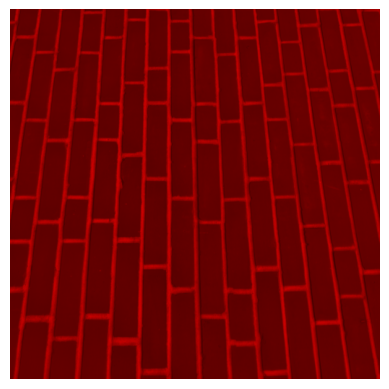

In [10]:
plt.imshow(c_bricks * [1, 0, 0])
plt.axis('off')
plt.show()

Now, let's apply the mask to replace the gray with a shade of red. Colours are a triple of numbers in the interval [0, 1], representing levels of Red, Green, and Blue.
For instance, [1, 1, 1] is the colour black.

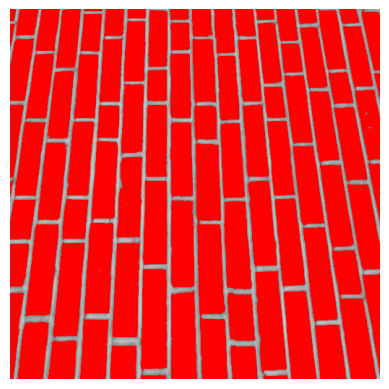

In [11]:
plt.imshow(
    np.where(
        (m_bricks > 0)[:, :, None], 
        np.ones_like(c_bricks) * [255, 0, 0], 
        c_bricks
    ) # alternative to this was creating a new variable red_bricks[m_bricks>0] = [255, 0, 0]
)
plt.axis('off')
plt.show()

We can see that this approach works better but the bricks are too homogeneous. Can we combine the two approaches?

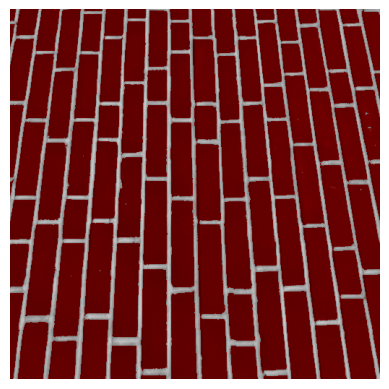

In [12]:
plt.imshow(
    np.where(
        (m_bricks > 0)[:, :, None], 
        c_bricks * [1, 0, 0], 
        c_bricks
    ) # alternative to this was creating a new variable red_bricks[m_bricks>0] = [255, 0, 0]
)
plt.axis('off')
plt.show()